<a href="https://colab.research.google.com/github/kylemcq13/Projects/blob/master/16_5_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment

In this assignment, you'll continue working with the [U.S. Education Dataset](https://www.kaggle.com/noriuk/us-education-datasets-unification-project/home) from Kaggle. The data gives detailed state level information on the several facets of the state of education on an annual basis. To learn more about the data and the column descriptions, you can view the Kaggle link above. You should access the data from the Thinkful database. Here's the credentials you can use to connect to the database:

postgres_user = 'dsbc_student'<br>
postgres_pw = '7\*.8G9QH21'<br>
postgres_host = '142.93.121.174'<br>
postgres_port = '5432'<br>
postgres_db = 'useducation'<br>

Don't forget to apply the most suitable missing value filling techniques you applied in the previous checkpoint to the data. You're supposed to provide your answers to the following questions after you handled the missing values.

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

1. Derive the descriptive statistics of the data and discuss the points you find remarkable.
2. Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.
3. In your chosen state, which of the lessons are the students more successful, math or reading?
4. What are the distributions of the math and reading scores in the sample?
5. Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables. 

In [0]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
import matplotlib.pyplot as plt
from scipy.stats import zscore
from scipy.stats.mstats import winsorize

warnings.filterwarnings('ignore')

In [0]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

edu_df = pd.read_sql_query('select * from useducation',con=engine)

engine.dispose()

In [0]:
columns = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE", 
           "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE", 
           "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
           "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G", 
           "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G", 
           "GRADES_9_12_G", "GRADES_ALL_G", "AVG_MATH_4_SCORE", "AVG_MATH_8_SCORE", 
           "AVG_READING_4_SCORE", "AVG_READING_8_SCORE"]

edu5_df = edu_df.copy()
states = edu5_df["STATE"].unique()

for col in columns:
    for state in states:
        edu5_df.loc[edu5_df["STATE"] == state, col] = edu5_df.loc[edu5_df["STATE"] == state, col].fillna(edu5_df[edu5_df["STATE"] == state][col].interpolate())
        
edu5_df.dropna(inplace=True)
edu5_df.head(50)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
54,1993_ARIZONA,ARIZONA,1993,676297.0,3427976.0,318465.0,1415407.0,1694104.0,3623946.0,1578889.0,...,57701.0,53500.0,37614.0,461398.0,182737.0,647299.0,215.834434,265.993417,206.291984,262.448330
55,1993_ARKANSAS,ARKANSAS,1993,311432.0,1346909.0,128196.0,771079.0,447634.0,1376067.0,782791.0,...,34255.0,36471.0,27169.0,280280.0,125801.0,407329.0,211.616130,257.647254,208.685273,266.423396
57,1993_COLORADO,COLORADO,1993,539538.0,3058326.0,147793.0,1242337.0,1668196.0,3028305.0,1537714.0,...,50807.0,47665.0,34770.0,403871.0,164260.0,575380.0,222.219036,273.200878,215.523979,266.856804
58,1993_CONNECTICUT,CONNECTICUT,1993,471918.0,4064158.0,149204.0,1433539.0,2481415.0,4079943.0,2302852.0,...,39093.0,34662.0,27979.0,310022.0,127655.0,443893.0,228.105503,275.202320,224.712775,264.457874
59,1993_DELAWARE,DELAWARE,1993,104355.0,683954.0,44497.0,443250.0,196207.0,694534.0,394680.0,...,8285.0,8265.0,5882.0,67899.0,28930.0,97394.0,217.181255,263.834857,207.792430,262.255809
60,1993_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,1993,80937.0,721151.0,73882.0,0.0,647269.0,719440.0,339266.0,...,5870.0,4935.0,3303.0,46917.0,17854.0,69987.0,191.234082,234.401343,179.324956,265.717190
61,1993_FLORIDA,FLORIDA,1993,1980569.0,11370156.0,947326.0,5520893.0,4901937.0,11425183.0,5333136.0,...,168509.0,149054.0,100646.0,1313261.0,525569.0,1873623.0,214.208209,260.841485,205.486357,260.395898
106,1994_ARIZONA,ARIZONA,1994,708482.0,3566586.0,348847.0,1478372.0,1739367.0,3803379.0,1652311.0,...,60032.0,55334.0,40119.0,475475.0,194196.0,673211.0,216.414936,266.620556,206.371252,262.726766
107,1994_ARKANSAS,ARKANSAS,1994,312695.0,1393287.0,132108.0,810396.0,450783.0,1445984.0,816270.0,...,34488.0,36437.0,27161.0,279964.0,127437.0,409053.0,213.026232,258.982418,208.736087,268.227127
109,1994_COLORADO,COLORADO,1994,549570.0,3061865.0,165539.0,1269532.0,1626794.0,3113755.0,1574164.0,...,51877.0,49332.0,35464.0,410452.0,170200.0,590505.0,223.414643,274.003324,217.567067,267.293921


1. Derive the descriptive statistics of the data and discuss the points you find remarkable.

In [0]:
edu5_df.describe(include = 'all')

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1046,1046,1046.000000,1.046000e+03,1.046000e+03,1.046000e+03,1.046000e+03,1.046000e+03,1.046000e+03,1.046000e+03,...,1046.000000,1046.000000,1046.000000,1.046000e+03,1.046000e+03,1.046000e+03,1046.000000,1046.000000,1046.000000,1046.000000
unique,1041,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2008_VIRGINIA,DISTRICT_OF_COLUMBIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2006.970363,9.312498e+05,1.016897e+07,8.849582e+05,4.715139e+06,4.568873e+06,1.025869e+07,5.302625e+06,...,71534.228967,71677.377629,62567.048279,5.751591e+05,2.797579e+05,8.764167e+05,235.269162,278.747113,219.099817,263.615681
std,NaN,NaN,6.242782,1.104296e+06,1.288751e+07,1.261405e+06,6.105385e+06,5.989616e+06,1.308992e+07,6.879720e+06,...,85272.286001,84302.592122,74919.819069,6.824060e+05,3.325605e+05,1.040403e+06,9.632646,9.912572,7.804302,5.768169
min,NaN,NaN,1993.000000,4.386600e+04,6.559710e+05,4.062200e+04,0.000000e+00,2.853100e+04,6.578090e+05,2.834840e+05,...,2548.000000,1485.000000,484.000000,1.922600e+04,2.758000e+03,2.455400e+04,187.134670,232.831510,179.324956,236.379102
25%,NaN,NaN,2002.000000,2.743105e+05,2.571806e+06,2.323988e+05,1.384262e+06,9.253550e+05,2.537691e+06,1.347766e+06,...,20166.750000,20564.750000,18304.000000,1.649732e+05,8.084075e+04,2.573745e+05,230.660761,273.383577,214.943439,259.956991
50%,NaN,NaN,2007.000000,6.638440e+05,5.842360e+06,4.945290e+05,2.906463e+06,2.335014e+06,5.959529e+06,2.999999e+06,...,50695.000000,49774.000000,40743.000000,4.052340e+05,1.859055e+05,6.232765e+05,237.041971,280.862695,220.962973,264.517851
75%,NaN,NaN,2012.000000,1.008680e+06,1.170678e+07,9.548370e+05,5.892033e+06,5.193129e+06,1.150621e+07,5.971732e+06,...,78924.000000,80671.250000,72551.000000,6.372388e+05,3.166840e+05,9.682915e+05,241.940254,285.257700,224.164324,267.663197


The average expenditure is greater than the average revenue.

Average math scores are noticeably higher than reading scores.

State revenue and local revenue on average are higher than federal revenue. 

Instruction expenditure is nearly half of total expenditure.

2. Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.

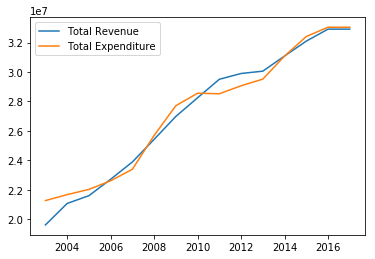

In [0]:
plt.plot(edu5_df.loc[edu5_df.STATE == 'ILLINOIS', 'YEAR'],
        edu5_df.loc[edu5_df.STATE == 'ILLINOIS', 'TOTAL_REVENUE'], label = 'Total Revenue')

plt.plot(edu5_df.loc[edu5_df.STATE == 'ILLINOIS', 'YEAR'],
        edu5_df.loc[edu5_df.STATE == 'ILLINOIS', 'TOTAL_EXPENDITURE'], label = 'Total Expenditure')

plt.legend()
plt.show()

I would expect a continuous increase in state revenue, given Illinois' history of taxes. The surprising part of this chart is the expenditure line which weaves above and below the revenue throughout the timeseries. Illinois is famous for spending more money than it takes in and the plot shows it works in a budget deficit in certain years.

It also seems as if data is missing from the 90's.

3. In your chosen state, which of the lessons are the students more successful, math or reading?

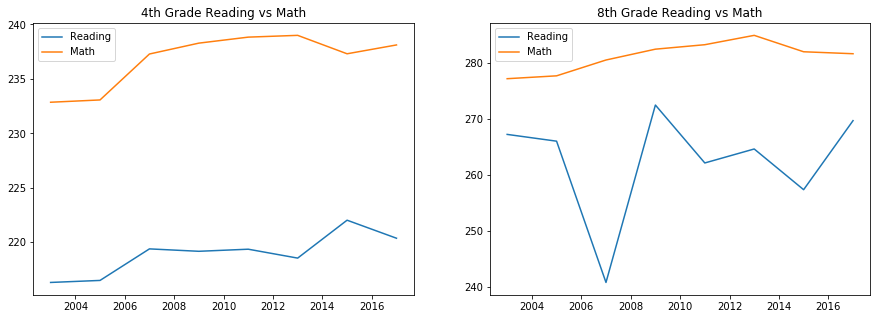

In [0]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(edu5_df.loc[edu5_df.STATE == 'ILLINOIS', 'YEAR'],
        edu5_df.loc[edu5_df.STATE == 'ILLINOIS', 'AVG_READING_4_SCORE'], label = 'Reading')

plt.plot(edu5_df.loc[edu5_df.STATE == 'ILLINOIS', 'YEAR'],
        edu5_df.loc[edu5_df.STATE == 'ILLINOIS', 'AVG_MATH_4_SCORE'], label = 'Math')

plt.legend()
plt.title('4th Grade Reading vs Math')

plt.subplot(1, 2, 2)
plt.plot(edu5_df.loc[edu5_df.STATE == 'ILLINOIS', 'YEAR'],
        edu5_df.loc[edu5_df.STATE == 'ILLINOIS', 'AVG_READING_8_SCORE'], label = 'Reading')

plt.plot(edu5_df.loc[edu5_df.STATE == 'ILLINOIS', 'YEAR'],
        edu5_df.loc[edu5_df.STATE == 'ILLINOIS', 'AVG_MATH_8_SCORE'], label = 'Math')

plt.legend()
plt.title('8th Grade Reading vs Math')
plt.show()

4. What are the distributions of the math and reading scores in the sample?

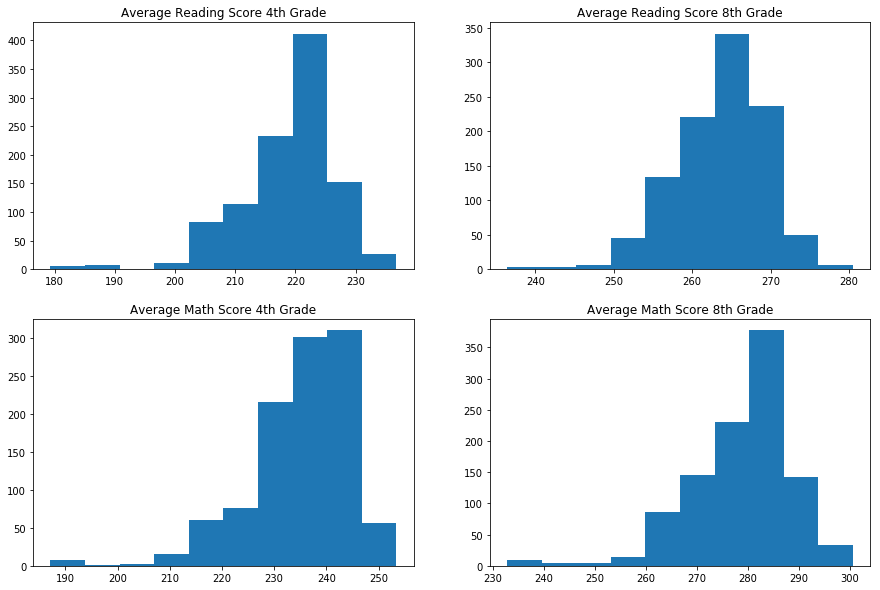

In [0]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.hist(edu5_df.AVG_READING_4_SCORE)
plt.title('Average Reading Score 4th Grade')

plt.subplot(2,2,2)
plt.hist(edu5_df.AVG_READING_8_SCORE)
plt.title('Average Reading Score 8th Grade')

plt.subplot(2,2,3)
plt.hist(edu5_df.AVG_MATH_4_SCORE)
plt.title('Average Math Score 4th Grade')

plt.subplot(2,2,4)
plt.hist(edu5_df.AVG_MATH_8_SCORE)
plt.title('Average Math Score 8th Grade')

plt.show()



The distributions aren't quite normal with some left skew. 

5. Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables.

In [0]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

edu_df = pd.read_sql_query('select * from useducation',con=engine)

engine.dispose()

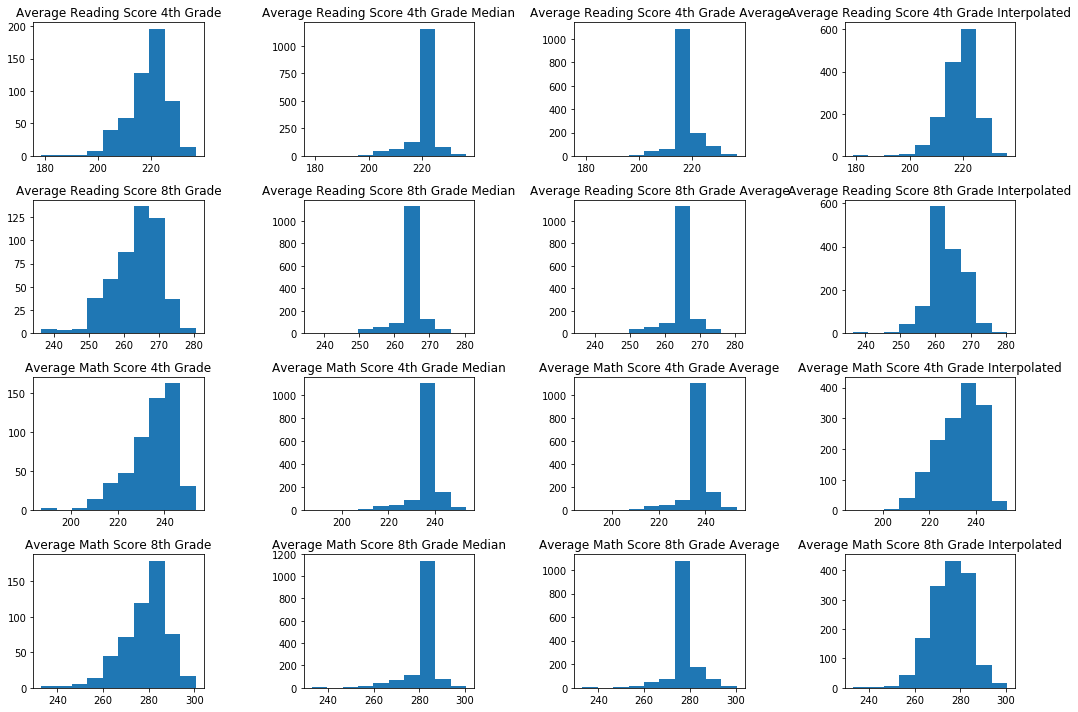

In [0]:
plt.figure(figsize=(15,10))

plt.subplot(4,4,1)
plt.hist(edu_df.AVG_READING_4_SCORE.dropna())
plt.title('Average Reading Score 4th Grade')

plt.subplot(4,4,2)
plt.hist(edu_df.AVG_READING_4_SCORE.fillna(edu_df.AVG_READING_4_SCORE.median()))
plt.title('Average Reading Score 4th Grade Median')

plt.subplot(4,4,3)
plt.hist(edu_df.AVG_READING_4_SCORE.fillna(edu_df.AVG_READING_4_SCORE.mean()))
plt.title('Average Reading Score 4th Grade Average')

plt.subplot(4,4,4)
plt.hist(edu_df.AVG_READING_4_SCORE.interpolate())
plt.title('Average Reading Score 4th Grade Interpolated')
         
plt.subplot(4,4,5)
plt.hist(edu_df.AVG_READING_8_SCORE.dropna())
plt.title('Average Reading Score 8th Grade')

plt.subplot(4,4,6)
plt.hist(edu_df.AVG_READING_8_SCORE.fillna(edu_df.AVG_READING_8_SCORE.median()))
plt.title('Average Reading Score 8th Grade Median')

plt.subplot(4,4,7)
plt.hist(edu_df.AVG_READING_8_SCORE.fillna(edu_df.AVG_READING_8_SCORE.mean()))
plt.title('Average Reading Score 8th Grade Average')

plt.subplot(4,4,8)
plt.hist(edu_df.AVG_READING_8_SCORE.interpolate().dropna())
plt.title('Average Reading Score 8th Grade Interpolated')

plt.subplot(4,4,9)
plt.hist(edu_df.AVG_MATH_4_SCORE.dropna())
plt.title('Average Math Score 4th Grade')

plt.subplot(4,4,10)
plt.hist(edu_df.AVG_MATH_4_SCORE.fillna(edu_df.AVG_MATH_4_SCORE.median()))
plt.title('Average Math Score 4th Grade Median')

plt.subplot(4,4,11)
plt.hist(edu_df.AVG_MATH_4_SCORE.fillna(edu_df.AVG_MATH_4_SCORE.mean()))
plt.title('Average Math Score 4th Grade Average')

plt.subplot(4,4,12)
plt.hist(edu_df.AVG_MATH_4_SCORE.interpolate())
plt.title('Average Math Score 4th Grade Interpolated')

plt.subplot(4,4,13)
plt.hist(edu_df.AVG_MATH_8_SCORE.dropna())
plt.title('Average Math Score 8th Grade')

plt.subplot(4,4,14)
plt.hist(edu_df.AVG_MATH_8_SCORE.fillna(edu_df.AVG_MATH_8_SCORE.median()))
plt.title('Average Math Score 8th Grade Median')

plt.subplot(4,4,15)
plt.hist(edu_df.AVG_MATH_8_SCORE.fillna(edu_df.AVG_MATH_8_SCORE.mean()))
plt.title('Average Math Score 8th Grade Average')

plt.subplot(4,4,16)
plt.hist(edu_df.AVG_MATH_8_SCORE.interpolate())
plt.title('Average Math Score 8th Grade Interpolated')

plt.tight_layout()
plt.show()

As can be seen, filling in missing values with averages and medians has a substantial effect on the dataset. Interpolating seems to change the scores the least. 